In [1]:
#Let's bring in a dataset and look at how we can show comparisons

import warnings
warnings.filterwarnings('ignore')  
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
file_loc = Path(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\CDS303-F22\data')
print(file_loc.is_dir())

True


In [2]:
#This raw dataset will be better for many of the comparison graphs we'll do.
#For now, do not worry about cleaning this one.
df_raw = sns.load_dataset('taxis')
df_raw.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [3]:
#Importing the cleaned dataset as well, just in case.
df_clean = pd.read_csv(file_loc/"Week5_output.csv")
df_clean.head()

,Unnamed: 0,c_yellow,p_credit,t_BronBron,t_BronBroo,t_BronManh,t_BronQuee,t_BrooBron,t_BrooBroo,t_BrooManh,...,d_Quee,d_Stat,pass,dist,fare,tip,tolls,total,p_day,p_hour
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.043336,0.040268,0.092712,0.0,0.067139,0.833333,0.869565
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.021259,0.026846,0.000000,0.0,0.046104,0.000000,0.695652
2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.037067,0.043624,0.101768,0.0,0.074112,0.333333,0.739130
3,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.209594,0.174497,0.265201,0.0,0.205452,1.000000,0.043478
4,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.4,0.058599,0.053691,0.047434,0.0,0.069733,0.833333,0.565217


In [4]:
#Let's bring in our stylesheet too.
#Here's what I need to define my own personal styles. I can save this as a style to call from the matplotlib folder.
#That way, instead of all the stuff that is needed for my_rcParams() being in this file, I would just call plt.style.use(my_rcParams)
#in the my_styleXY function.
axes = {'spines.right' : False,
        'spines.left' : False,
        'grid' : True,
        'grid.axis' : 'y',
        'grid.which' : 'major',
        'titlesize' : 16,
        'titleweight' : 'bold'}
lines = {'markerfacecolor' : 'gray'}
grid = {'color' : 'black',
        'alpha' : 0.1}
figure = {'figsize' : (5,3),
          'titlesize' : 25}
font = {'font.family':'serif',
        'font.style':'italic',
        'font.weight':800}
xtick = {'labelsize' : 5}
ytick = {'labelsize' : 10}

def my_rcParams():
        plt.style.use('default')
        plt.rc('axes', **axes),
        plt.rc('grid', **grid),
        plt.rc('ytick', **ytick),
        plt.rc('figure', **figure),
        plt.rc('lines', **lines),

#You could, in theory, turn this function into a library package, just like any other that you'd install / import.        
def my_styleXY(kind, x, y, nrows, ncols, index, xtext, ytext, suptitle, title, source):
        my_rcParams()
        ax = plt.subplot(nrows, ncols, index)
        if kind == 'bar': sns.barplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'scatter': sns.scatterplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'violin': sns.violinplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'line': sns.lineplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'strip': sns.stripplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'swarm': sns.swarmplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'boxen': sns.boxenplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'point': sns.pointplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'kde': sns.kdeplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'reg': sns.regplot(x = x, y = y, color = 'gray', ax = ax)
        ax.xaxis.set_label_text(xtext)
        ax.yaxis.set_label_text(ytext)
        fig.suptitle(suptitle, x = .15, fontsize = 16, 
                     fontstyle = 'italic', font = 'times new roman', 
                     transform = fig.transFigure, clip_on = False)
        ax.set_title(title, loc = 'left', fontsize = 12, fontstyle = 'italic', font = 'arial')
        ax.text(.04, -.01, source, transform=fig.transFigure, fontsize = 10, alpha = .7)
def my_styleX(kind, x, nrows, ncols, index, xtext, ytext, suptitle, title, source, kde = False):
        my_rcParams()
        ax = plt.subplot(nrows, ncols, index)
        if kind == 'hist': sns.histplot(x = x, color = 'gray', ax = ax, kde = kde) #Here we added an optional argument
        if kind == 'ecdf': sns.ecdfplot(x = x, color = 'gray', ax = ax)
        if kind == 'rug': sns.rugplot(x = x, color = 'gray', ax = ax)
        if kind == 'box': sns.boxplot(y = x, color = 'gray', ax = ax)
        if kind == 'count': sns.countplot(x = x, color = 'gray', ax = ax)
        ax.xaxis.set_label_text(xtext)
        ax.yaxis.set_label_text(ytext)
        fig.suptitle(suptitle, x = .15, fontsize = 16, 
                     fontstyle = 'italic', font = 'times new roman', 
                     transform = fig.transFigure, clip_on = False)
        ax.set_title(title, loc = 'left', fontsize = 12, fontstyle = 'italic', font = 'arial')
        ax.text(.04, -.01, source, transform=fig.transFigure, fontsize = 10, alpha = .7)

        #plus: ridge, small multiples, sparklines, heatmap


In [5]:
#What questions might we want to ask of this dataset. Note that every problem should start with the question, then
#move to the data. In real life, you should already have the question. For now, let's look at the columns and come up
#with some questions...
df_raw.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [6]:
#comparisons, distributions, trends, relationships, geospatial
#Comparison: How do the pickup and dropoff boroughs differ with respect to tips?
#Distributions: How are total fares distributed? By pickup / dropoff borough?
#Trend: How do tips vary by day of week?
#Relationships: How are pickup and dropoff boroughs related with respect to ride freqency?
#Geospatial: Where are the taxi hotspots in the city?

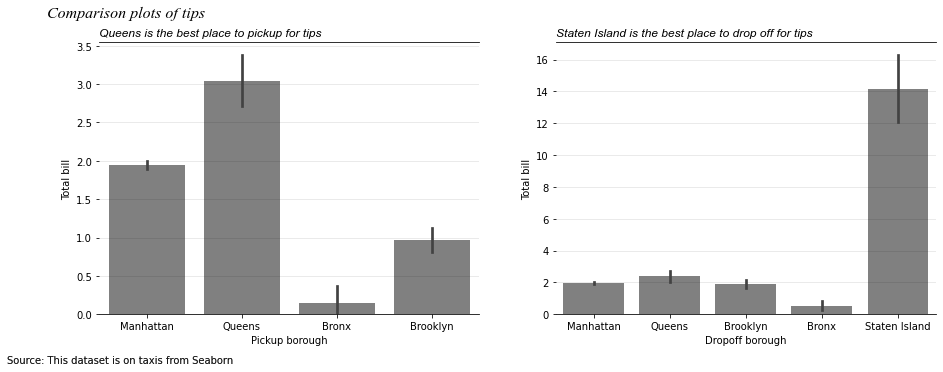

In [7]:
#Comparison: How do the pickup and dropoff boroughs differ with respect to tips?

fig = plt.figure(figsize=(15,5))
my_styleXY('bar', df_raw['pickup_borough'], df_raw['tip'], 1, 2, 1, "Pickup borough",
               "Total bill","Comparison plots of tips",'Queens is the best place to pickup for tips',
               "Source: This dataset is on taxis from Seaborn")
my_styleXY('bar', df_raw['dropoff_borough'], df_raw['tip'], 1, 2, 2, "Dropoff borough",
               "Total bill","Comparison plots of tips",'Staten Island is the best place to drop off for tips',
               "Source: This dataset is on taxis from Seaborn")

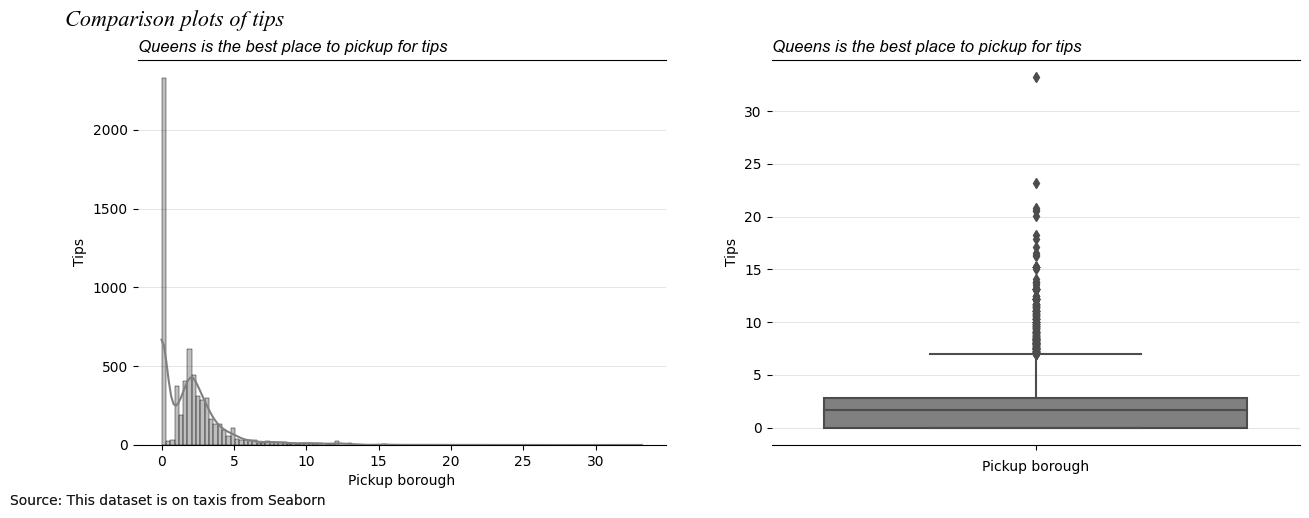

In [8]:
#Distributions: How are total fares distributed? By pickup / dropoff borough? 
fig = plt.figure(figsize=(15,5))
my_styleX('hist', df_raw['tip'], 1, 2, 1, "Pickup borough",
               "Tips","Comparison plots of tips",'Queens is the best place to pickup for tips', 
               "Source: This dataset is on taxis from Seaborn", True)
my_styleX('box', df_raw['tip'], 1, 2, 2, "Pickup borough",
               "Tips","Comparison plots of tips",'Queens is the best place to pickup for tips', 
               "Source: This dataset is on taxis from Seaborn")


In [9]:
#Trend: How do tips vary by day of the week?
#Note: we could use the df_clean version, but we can also easily extract what we need from date column here.
#Also, the weekdays have been normalized in df_clean, so harder to interpret
import datetime as dt
from datetime import date
#Monday = 0
df_raw['pickup'] = pd.to_datetime(df_raw['pickup'], format = '%Y-%m-%d %H:%M:%S')
df_raw['dropoff'] = pd.to_datetime(df_raw['dropoff'], format = '%Y-%m-%d %H:%M:%S')
df_raw['Pday'] = df_raw['pickup'].dt.weekday
df_raw['Dday'] = df_raw['dropoff'].dt.weekday

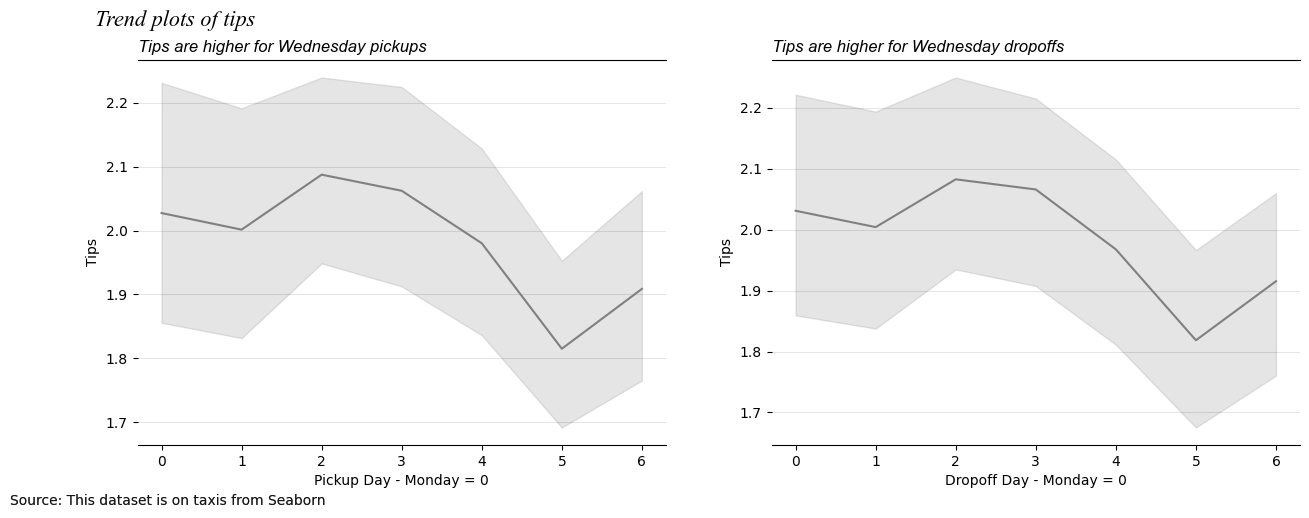

In [10]:
fig = plt.figure(figsize=(15,5))
my_styleXY('line', df_raw['Pday'], df_raw['tip'], 1, 2, 1, "Pickup Day - Monday = 0",
               "Tips","Trend plots of tips",'Tips are higher for Wednesday pickups',
               "Source: This dataset is on taxis from Seaborn")
my_styleXY('line', df_raw['Dday'], df_raw['tip'], 1, 2, 2, "Dropoff Day - Monday = 0",
               "Tips","Trend plots of tips",'Tips are higher for Wednesday dropoffs',
               "Source: This dataset is on taxis from Seaborn")
#Note: Wednesday pickups are generally Wednesday dropoffs...

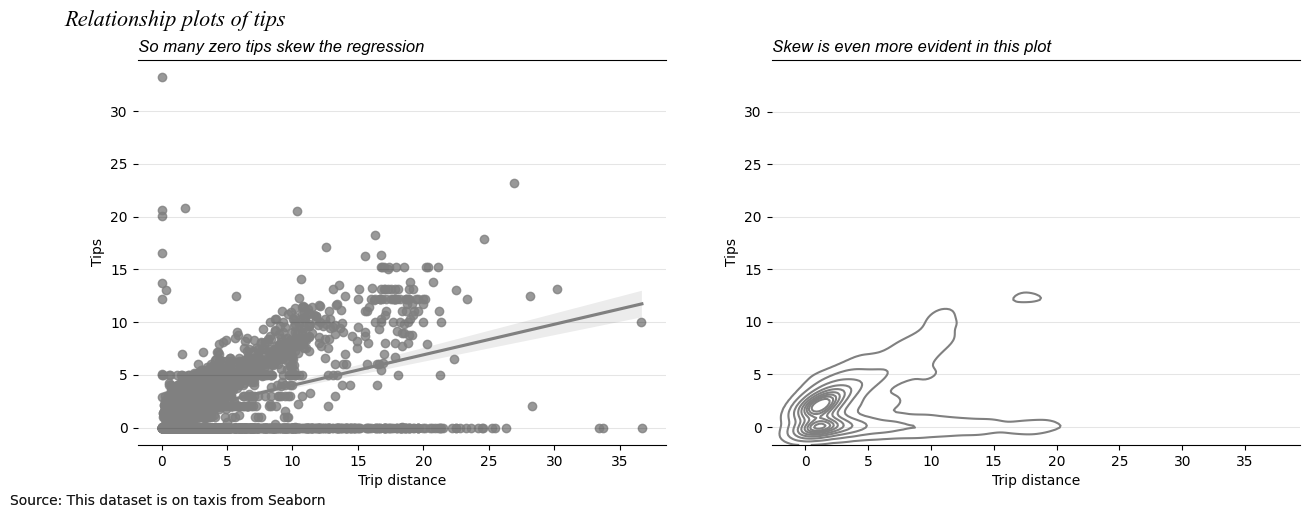

In [11]:
#Relationships: How are pickup and dropoff boroughs related with respect to ride freqency?
fig = plt.figure(figsize=(15,5))
my_styleXY('reg', df_raw['distance'], df_raw['tip'], 1, 2, 1, "Trip distance",
               "Tips","Relationship plots of tips",'So many zero tips skew the regression',
               "Source: This dataset is on taxis from Seaborn")
my_styleXY('kde', df_raw['distance'], df_raw['tip'], 1, 2, 2, "Trip distance",
               "Tips","Relationship plots of tips",'Skew is even more evident in this plot',
               "Source: This dataset is on taxis from Seaborn")

In [12]:
#HOW TO CREATE MORE COMPLEX VIZ LIKE NETWORK, SUNBURST, ETC.



In [13]:
#Geospatial: Where are the taxi hotspots in the city?


In [15]:
import sweetviz

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



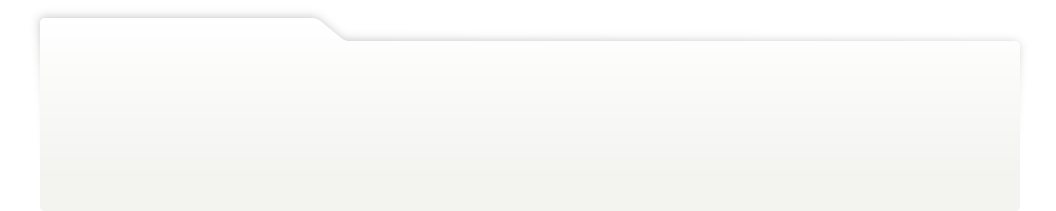
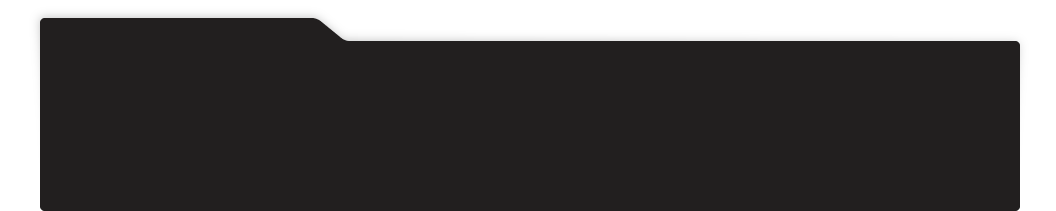
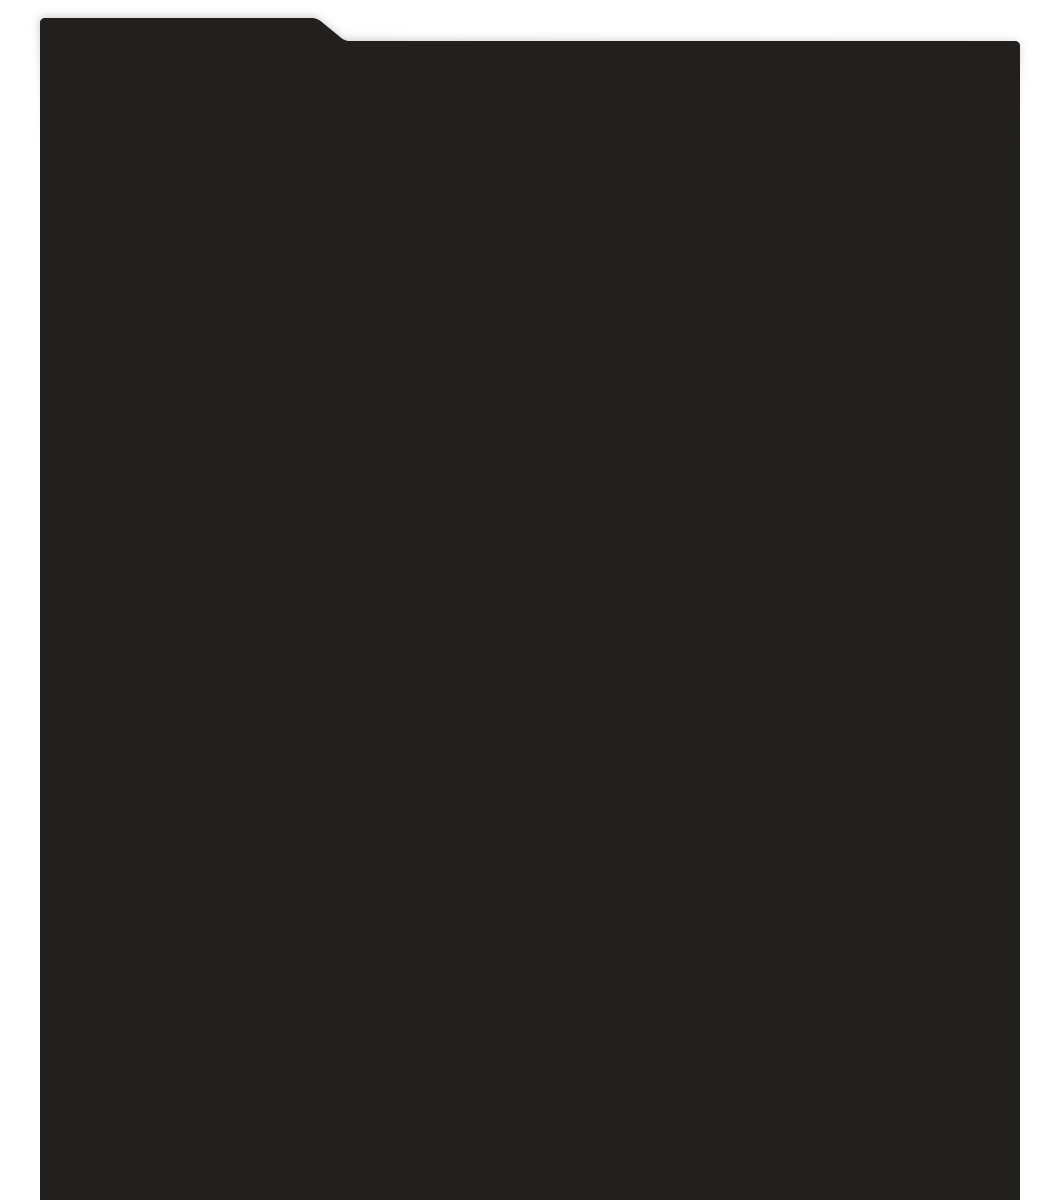
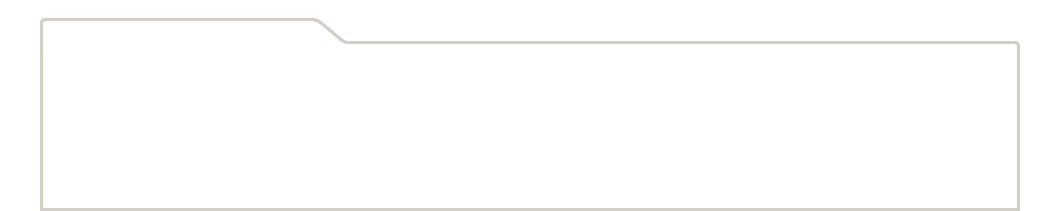
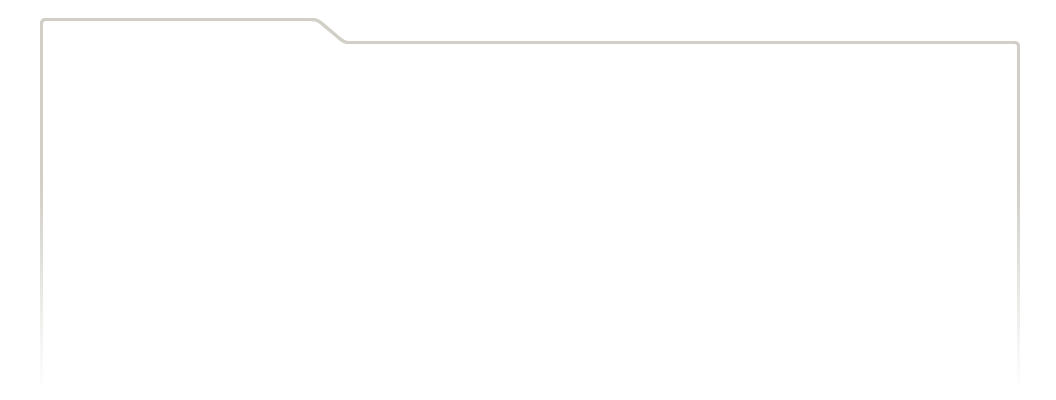
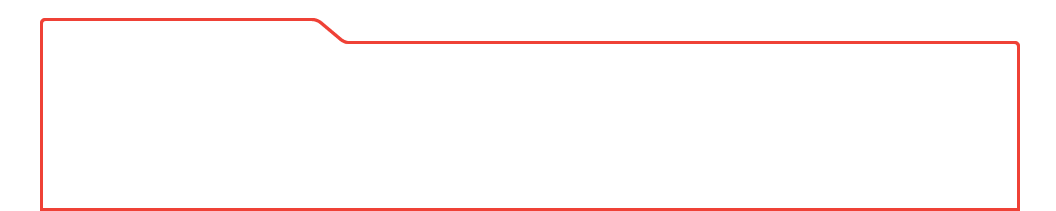
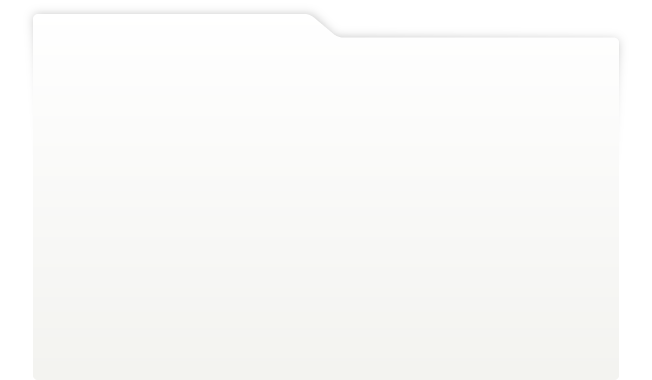
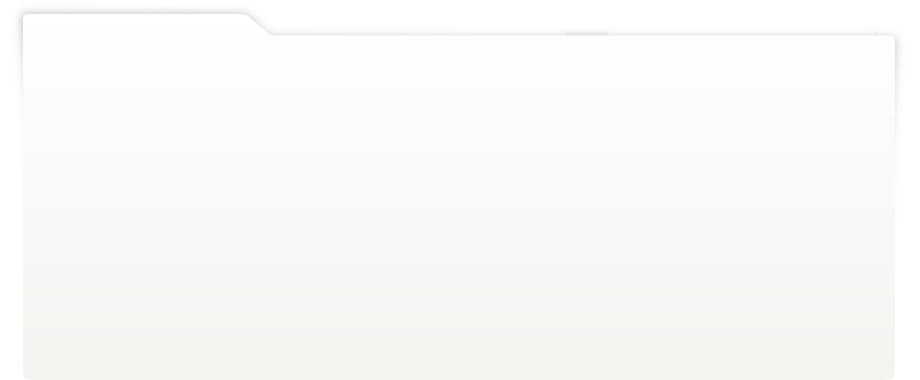
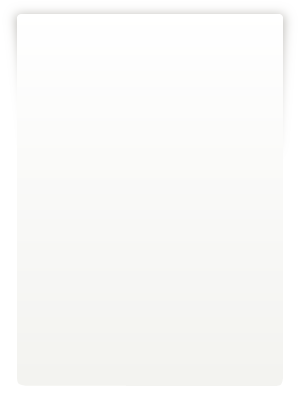
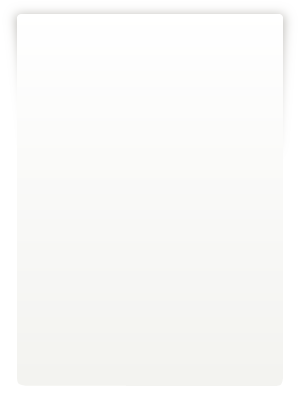
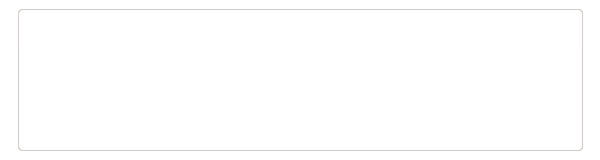
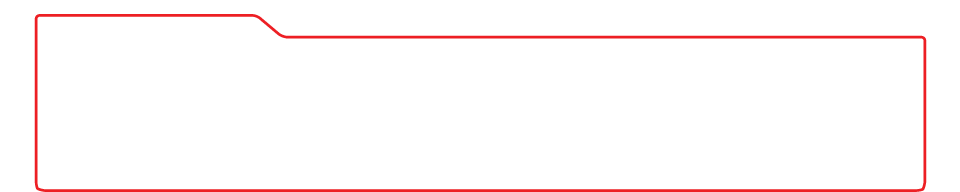
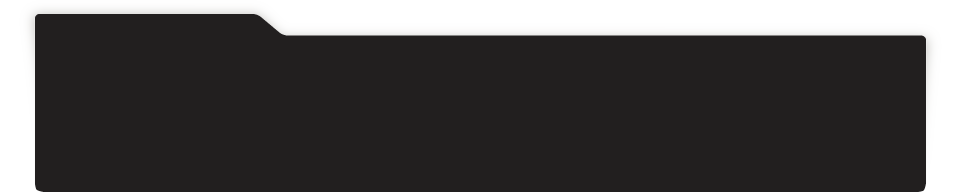
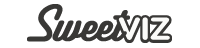
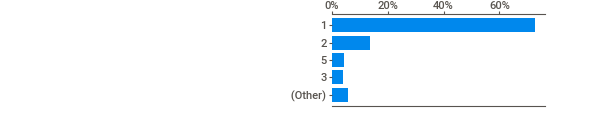
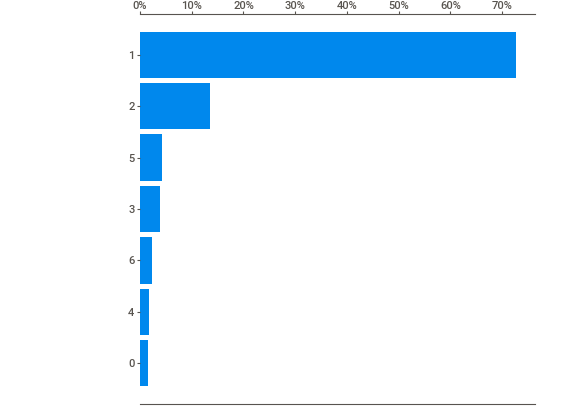
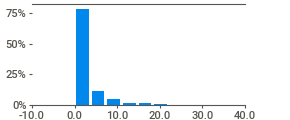
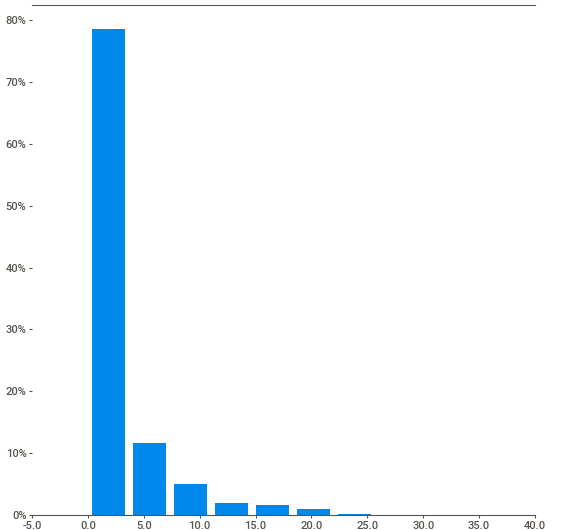
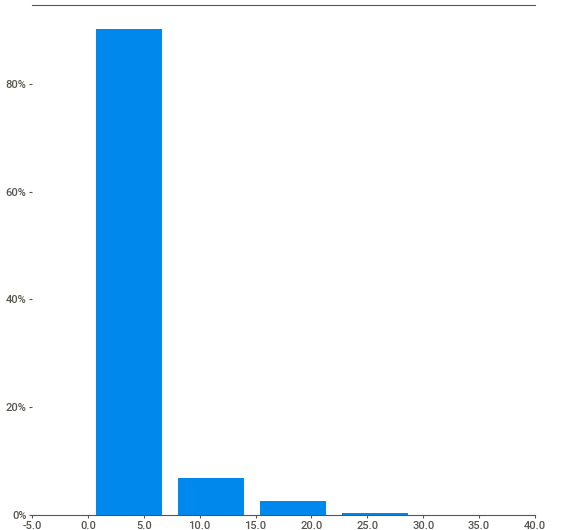
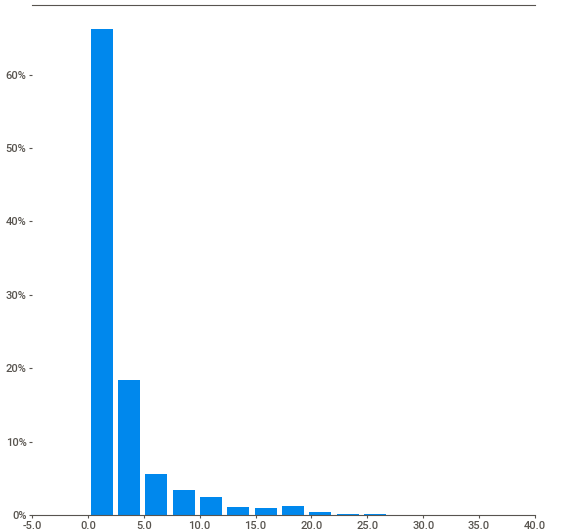
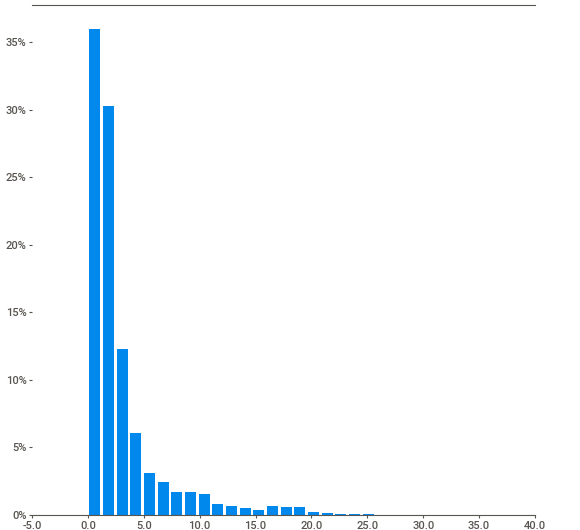
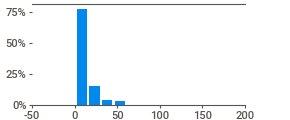
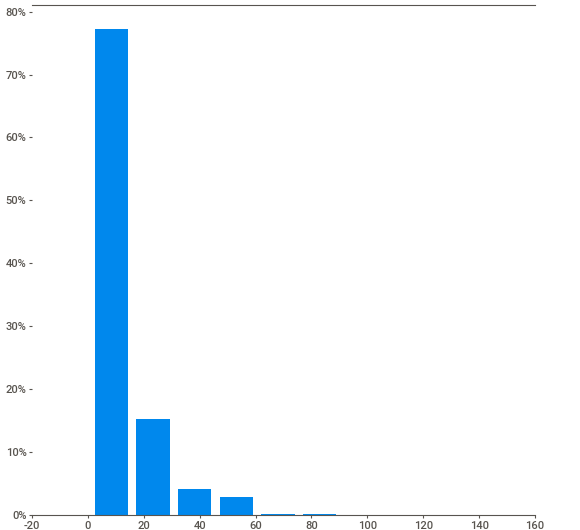
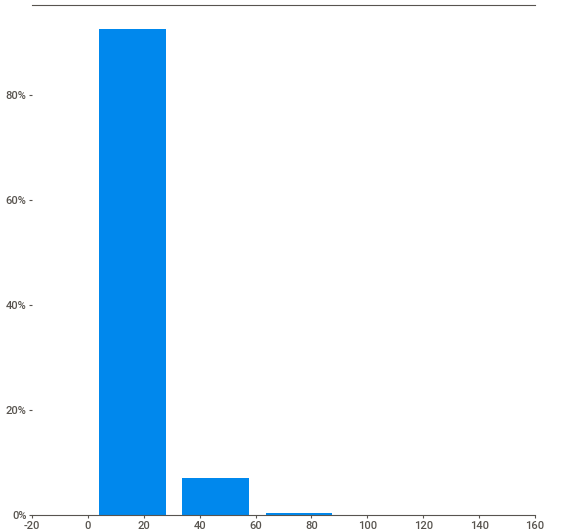
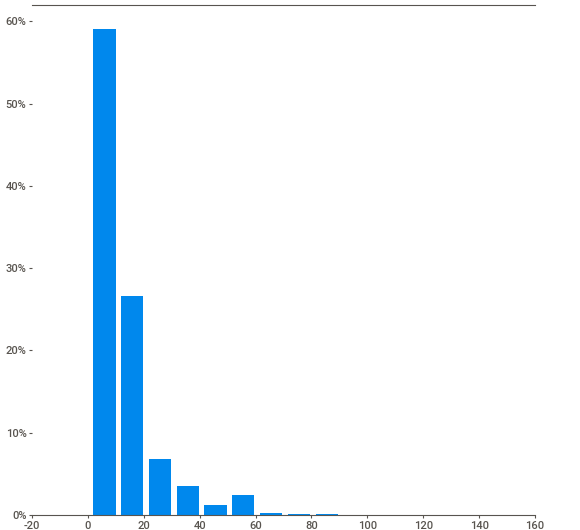
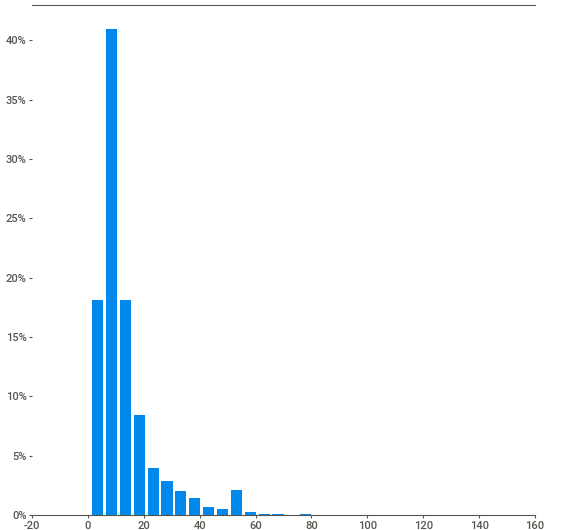
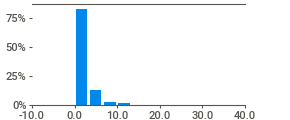
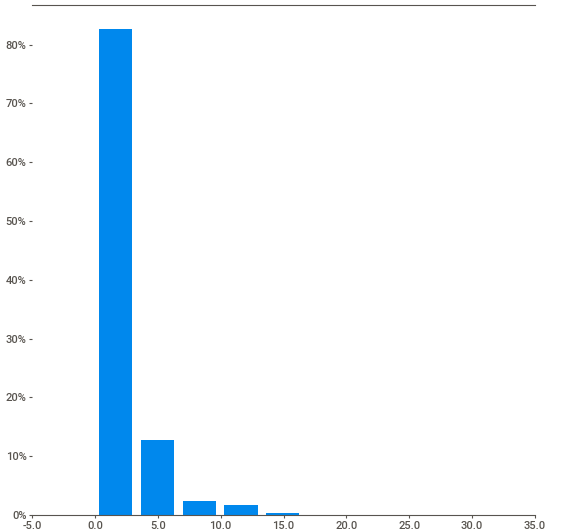
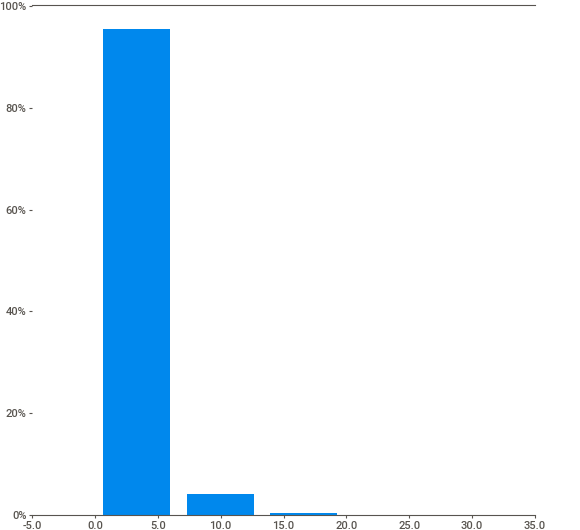
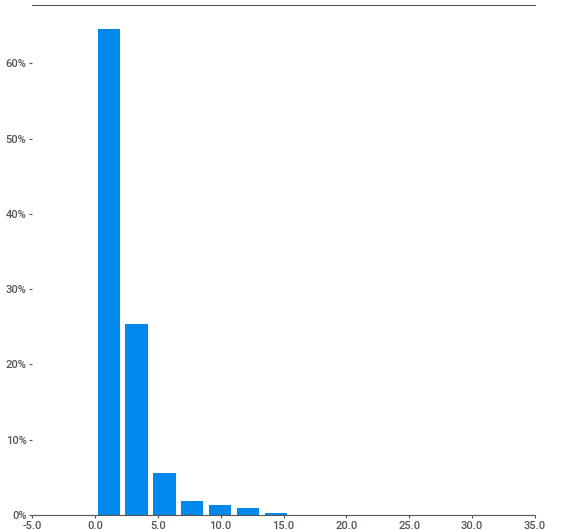
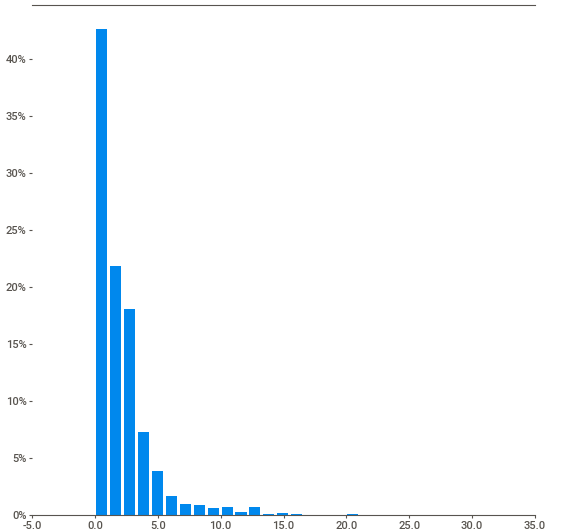
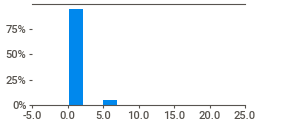
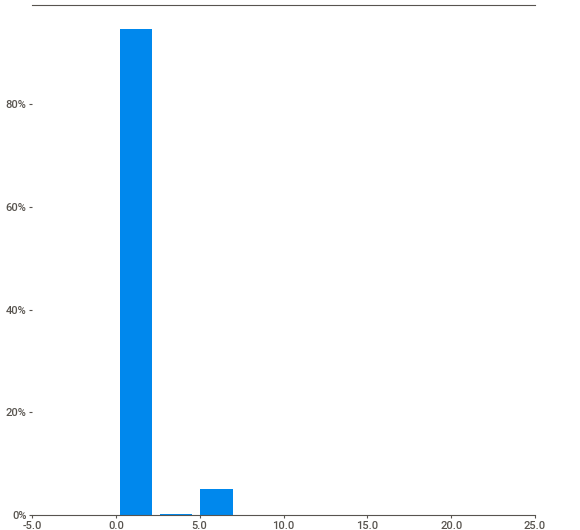
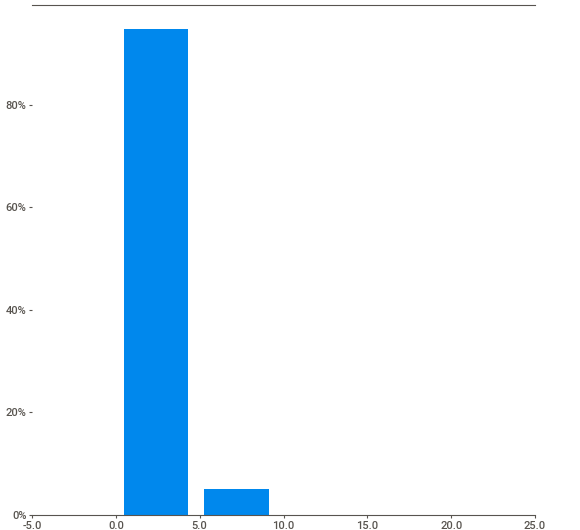
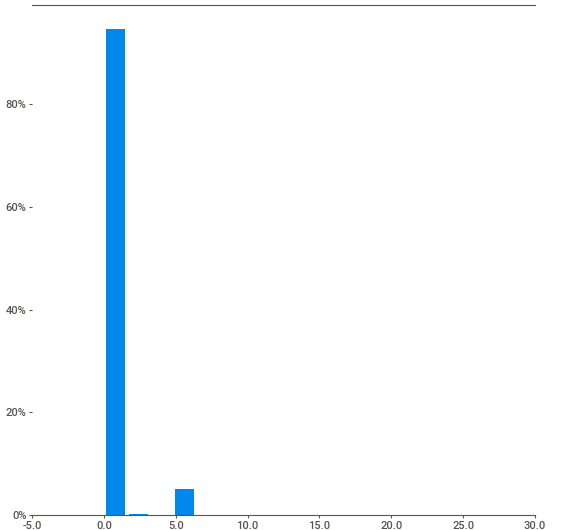
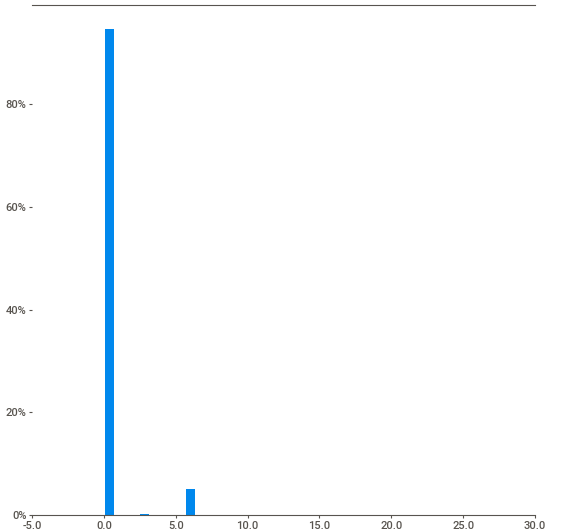
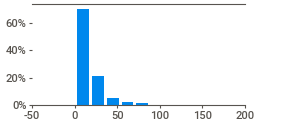
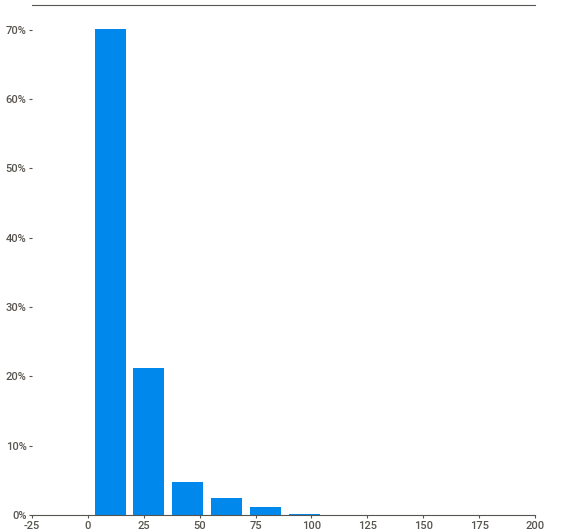
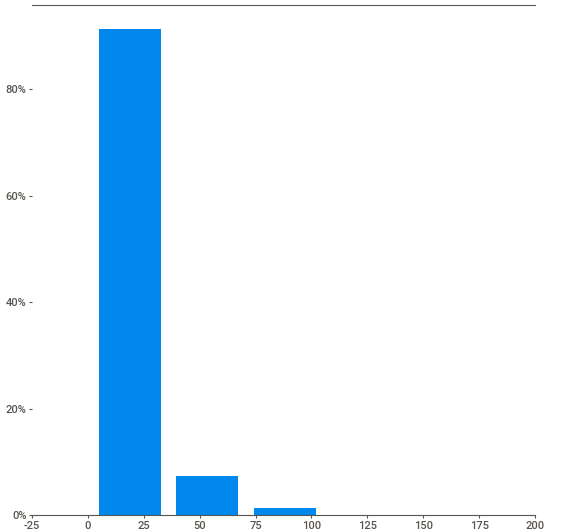
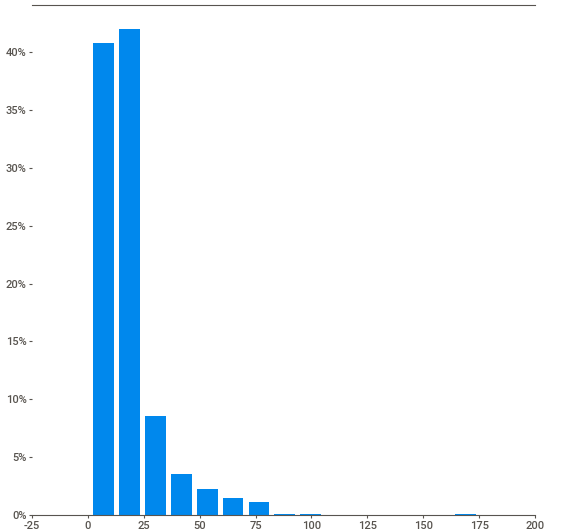
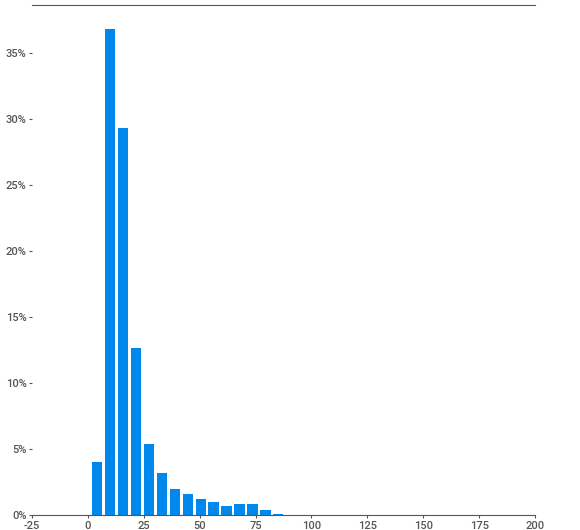
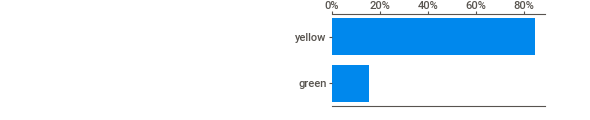
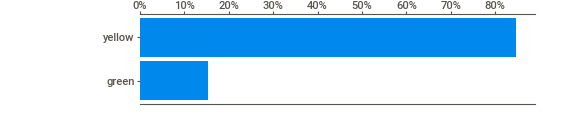
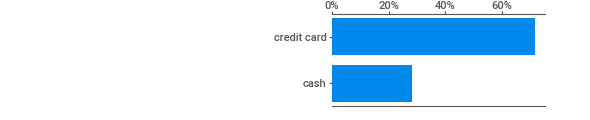
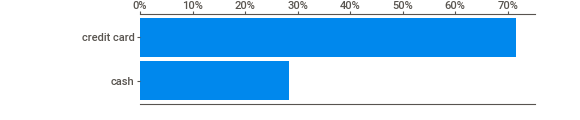
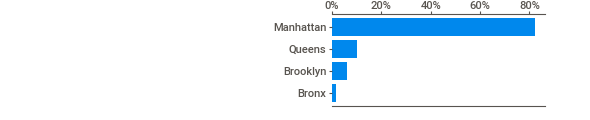
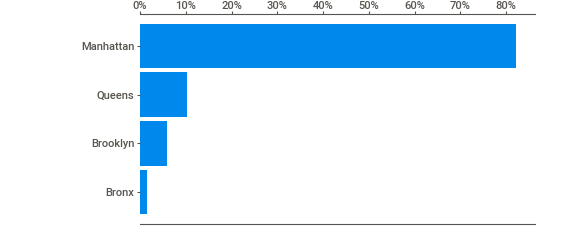
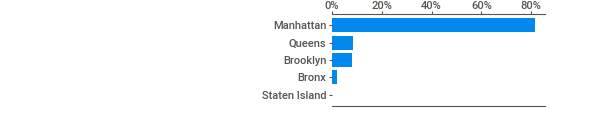
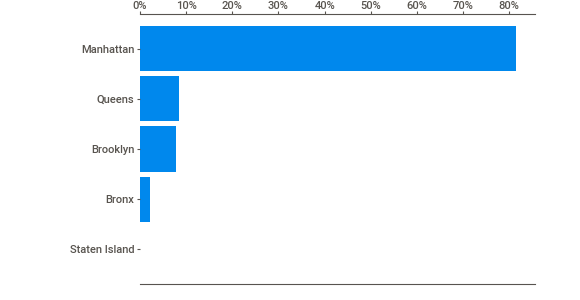
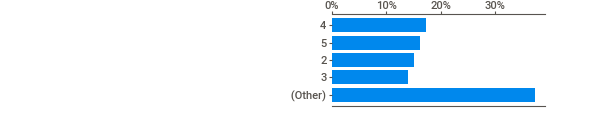
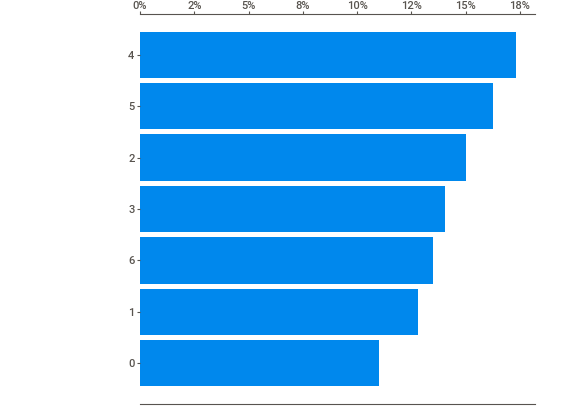
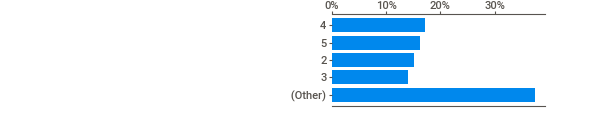
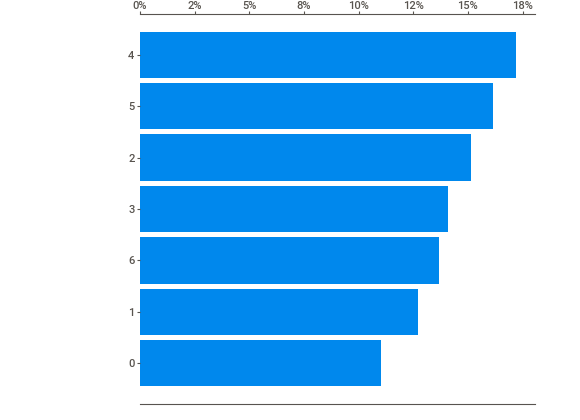
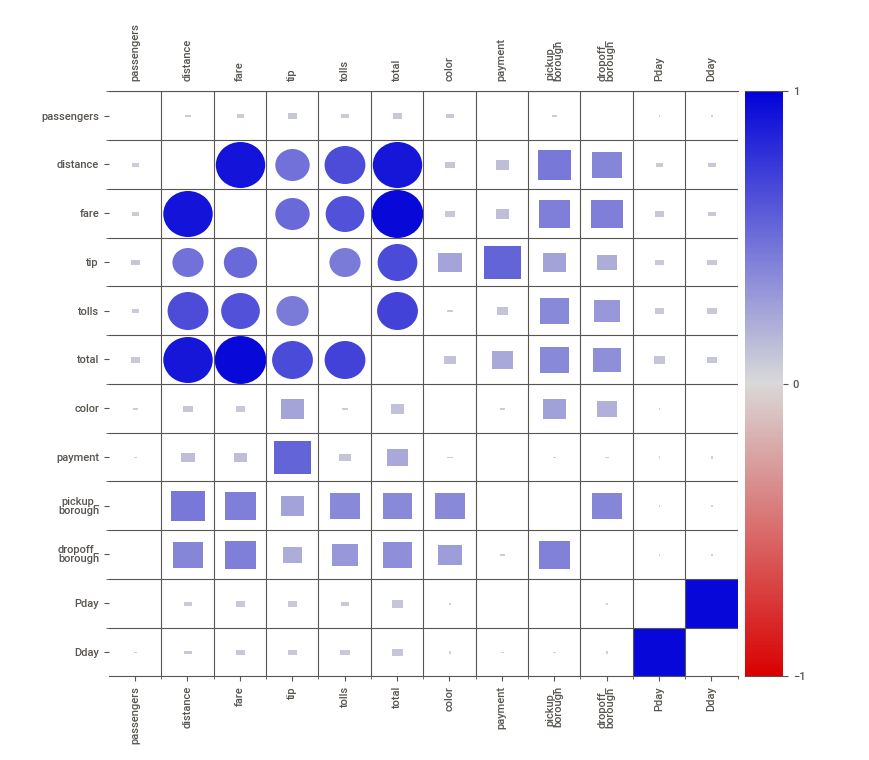
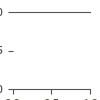

In [23]:
report = sweetviz.analyze(df_raw)
report.show_notebook()